In [1]:
import warnings

import pandas as pd

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from fairfl.utils.read_data import DatasetUtils
import matplotlib.pyplot as plt

from aif360.algorithms.preprocessing import Reweighing
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


In [3]:
# Metrics function
from collections import OrderedDict
from aif360.metrics import ClassificationMetric

def compute_metrics(dataset_true, dataset_pred, 
                    unprivileged_groups, privileged_groups,
                    disp = True):
    """ Compute the key metrics """
    classified_metric_pred = ClassificationMetric(dataset_true,
                                                 dataset_pred, 
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    metrics = OrderedDict()
    metrics["Balanced accuracy"] = 0.5*(classified_metric_pred.true_positive_rate()+
                                             classified_metric_pred.true_negative_rate())
    metrics["Statistical parity difference"] = classified_metric_pred.statistical_parity_difference()
    metrics["Disparate impact"] = classified_metric_pred.disparate_impact()
    metrics["Average odds difference"] = classified_metric_pred.average_odds_difference()
    metrics["Equal opportunity difference"] = classified_metric_pred.equal_opportunity_difference()
    metrics["Theil index"] = classified_metric_pred.theil_index()
    
    if disp:
        for k in metrics:
            print("%s = %.4f" % (k, metrics[k]))
    
    return metrics

In [4]:
utils = DatasetUtils()
states_selected = ["MT", "NH", "ND", "ME", "SD"]

In [5]:
train = pd.read_csv("../dataset/train_preprocessed.csv")
test = pd.read_csv("../dataset/test_preprocessed.csv")


In [6]:
# MT state için yapalım önce
train_state, test_state = utils.get_state_data(train, test, "MT")
train_state = train_state.reset_index(drop=True)
test_state = test_state.reset_index(drop=True)

In [7]:
mt_res_df = pd.DataFrame({"state": ["MT"]})

In [8]:
y_test_mt = test_state['PINCP']
x_test_mt = test_state.drop('PINCP', axis=1)

y_train_mt = train_state['PINCP']
x_train_mt = train_state.drop('PINCP', axis=1)

In [9]:
x_train_mt.groupby("RAC1P").count().head()

,AGEP,SCHL,POBP,WKHP,COW_1.0,COW_2.0,COW_3.0,COW_4.0,COW_5.0,COW_6.0,...,RELP_10.0,RELP_11.0,RELP_12.0,RELP_13.0,RELP_14.0,RELP_15.0,RELP_16.0,RELP_17.0,SEX_Female,SEX_Male
RAC1P,,,,,,,,,,,,,,,,,,,,,
0,3715,3715,3715,3715,3715,3715,3715,3715,3715,3715,...,3715,3715,3715,3715,3715,3715,3715,3715,3715,3715
1,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [10]:
privileged_groups = [{'RAC1P': 0}]
unprivileged_groups = [{'RAC1P': 1}]

In [11]:
train_dataset = BinaryLabelDataset(df=pd.concat([x_train_mt, y_train_mt], axis=1),
                                   favorable_label=1, unfavorable_label=0,
                                   label_names=['PINCP'], protected_attribute_names=['RAC1P'],
                                   privileged_protected_attributes=[[0]],
                                   unprivileged_protected_attributes=[[1]])


In [12]:
test_dataset = BinaryLabelDataset(df=pd.concat([x_test_mt, y_test_mt], axis=1),
                                  favorable_label=1, unfavorable_label=0,
                                  label_names=['PINCP'], protected_attribute_names=['RAC1P'],
                                  privileged_protected_attributes=[[0]],
                                  unprivileged_protected_attributes=[[1]])

In [13]:
from IPython.display import Markdown, display

# print out some labels, names, etc.
display(Markdown("#### Training Dataset shape"))
print(train_dataset.features.shape)
display(Markdown("#### Favorable and unfavorable labels"))
print(train_dataset.favorable_label, train_dataset.unfavorable_label)
display(Markdown("#### Protected attribute names"))
print(train_dataset.protected_attribute_names)
display(Markdown("#### Privileged and unprivileged protected attribute values"))
print(train_dataset.privileged_protected_attributes,
      train_dataset.unprivileged_protected_attributes)
display(Markdown("#### Dataset feature names"))
print(train_dataset.feature_names)

#### Training Dataset shape

(3725, 567)


#### Favorable and unfavorable labels

1.0 0.0


#### Protected attribute names

['RAC1P']


#### Privileged and unprivileged protected attribute values

[[0]] [[1]]


#### Dataset feature names

['AGEP', 'SCHL', 'POBP', 'WKHP', 'RAC1P', 'COW_1.0', 'COW_2.0', 'COW_3.0', 'COW_4.0', 'COW_5.0', 'COW_6.0', 'COW_7.0', 'COW_8.0', 'MAR_Divorced', 'MAR_Married', 'MAR_Never married or under 15 years old', 'MAR_Separated', 'MAR_Widowed', 'OCCP_10.0', 'OCCP_20.0', 'OCCP_40.0', 'OCCP_51.0', 'OCCP_52.0', 'OCCP_60.0', 'OCCP_101.0', 'OCCP_102.0', 'OCCP_110.0', 'OCCP_120.0', 'OCCP_135.0', 'OCCP_136.0', 'OCCP_137.0', 'OCCP_140.0', 'OCCP_150.0', 'OCCP_160.0', 'OCCP_205.0', 'OCCP_220.0', 'OCCP_230.0', 'OCCP_300.0', 'OCCP_310.0', 'OCCP_335.0', 'OCCP_340.0', 'OCCP_350.0', 'OCCP_360.0', 'OCCP_410.0', 'OCCP_420.0', 'OCCP_425.0', 'OCCP_440.0', 'OCCP_500.0', 'OCCP_510.0', 'OCCP_520.0', 'OCCP_530.0', 'OCCP_540.0', 'OCCP_565.0', 'OCCP_600.0', 'OCCP_630.0', 'OCCP_640.0', 'OCCP_650.0', 'OCCP_700.0', 'OCCP_705.0', 'OCCP_710.0', 'OCCP_725.0', 'OCCP_726.0', 'OCCP_735.0', 'OCCP_750.0', 'OCCP_800.0', 'OCCP_810.0', 'OCCP_820.0', 'OCCP_830.0', 'OCCP_845.0', 'OCCP_850.0', 'OCCP_860.0', 'OCCP_900.0', 'OCCP_910.0', 

In [14]:
metric_orig_train = BinaryLabelDatasetMetric(train_dataset,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print(
    "Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = -0.298250


In [15]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
dataset_transf_train = RW.fit_transform(train_dataset)

/home/safir/.virtualenvs/ACIncome_bias_fl/lib/python3.8/site-packages/aif360/algorithms/preprocessing/reweighing.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  self.w_up_fav = n_fav*n_up / (n*n_up_fav)


In [16]:
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train,
                                               unprivileged_groups=unprivileged_groups,
                                               privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))

print(
    "Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.297450


In [17]:
from sklearn.linear_model import LogisticRegression
import numpy as np

lmod = LogisticRegression()
lmod.fit(x_train_mt, y_train_mt,
         sample_weight=train_dataset.instance_weights)
y_train_pred = lmod.predict(x_train_mt)

# positive class index
pos_ind = np.where(lmod.classes_ == train_dataset.favorable_label)[0][0]

dataset_orig_train_pred = train_dataset.copy()
dataset_orig_train_pred.labels = y_train_pred

/home/safir/.virtualenvs/ACIncome_bias_fl/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
dataset_orig_valid_pred = train_dataset.copy(deepcopy=True)
x_valid = dataset_orig_valid_pred.features
y_valid = dataset_orig_valid_pred.labels
dataset_orig_valid_pred.scores = lmod.predict_proba(x_valid)[:, pos_ind].reshape(-1, 1)

dataset_orig_test_pred = test_dataset.copy(deepcopy=True)
X_test = dataset_orig_test_pred.features
y_test = dataset_orig_test_pred.labels
dataset_orig_test_pred.scores = lmod.predict_proba(X_test)[:, pos_ind].reshape(-1, 1)

/home/safir/.virtualenvs/ACIncome_bias_fl/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/safir/.virtualenvs/ACIncome_bias_fl/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
from aif360.metrics import ClassificationMetric

num_thresh = 100
ba_arr = np.zeros(num_thresh)
class_thresh_arr = np.linspace(0.01, 0.99, num_thresh)
for idx, class_thresh in enumerate(class_thresh_arr):
    
    fav_inds = dataset_orig_valid_pred.scores > class_thresh
    dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
    dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label
    
    classified_metric_orig_valid = ClassificationMetric(train_dataset,
                                             dataset_orig_valid_pred, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
    
    ba_arr[idx] = 0.5*(classified_metric_orig_valid.true_positive_rate()\
                       +classified_metric_orig_valid.true_negative_rate())

best_ind = np.where(ba_arr == np.max(ba_arr))[0][0]
best_class_thresh = class_thresh_arr[best_ind]

print("Best balanced accuracy (no reweighing) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (no reweighing) = %.4f" % best_class_thresh)

Best balanced accuracy (no reweighing) = 0.7683
Optimal classification threshold (no reweighing) = 0.3367


In [20]:
from tqdm import tqdm

display(Markdown("#### Predictions from original testing data"))
bal_acc_arr_orig = []
disp_imp_arr_orig = []
avg_odds_diff_arr_orig = []

print("Classification threshold used = %.4f" % best_class_thresh)
for thresh in tqdm(class_thresh_arr):
    
    if thresh == best_class_thresh:
        disp = True
    else:
        disp = False
    
    fav_inds = dataset_orig_test_pred.scores > thresh
    dataset_orig_test_pred.labels[fav_inds] = dataset_orig_test_pred.favorable_label
    dataset_orig_test_pred.labels[~fav_inds] = dataset_orig_test_pred.unfavorable_label
    
    metric_test_bef = compute_metrics(test_dataset, dataset_orig_test_pred, 
                                      unprivileged_groups, privileged_groups,
                                      disp = disp)

    bal_acc_arr_orig.append(metric_test_bef["Balanced accuracy"])
    avg_odds_diff_arr_orig.append(metric_test_bef["Average odds difference"])
    disp_imp_arr_orig.append(metric_test_bef["Disparate impact"])

#### Predictions from original testing data

Classification threshold used = 0.3367


 41%|████      | 41/100 [00:00<00:00, 406.40it/s]

Balanced accuracy = 0.7357
Statistical parity difference = 0.1326
Disparate impact = 1.3611
Average odds difference = -0.1373
Equal opportunity difference = -0.7076
Theil index = 0.1330


 83%|████████▎ | 83/100 [00:00<00:00, 411.89it/s]/home/safir/.virtualenvs/ACIncome_bias_fl/lib/python3.8/site-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)
100%|██████████| 100/100 [00:00<00:00, 388.58it/s]


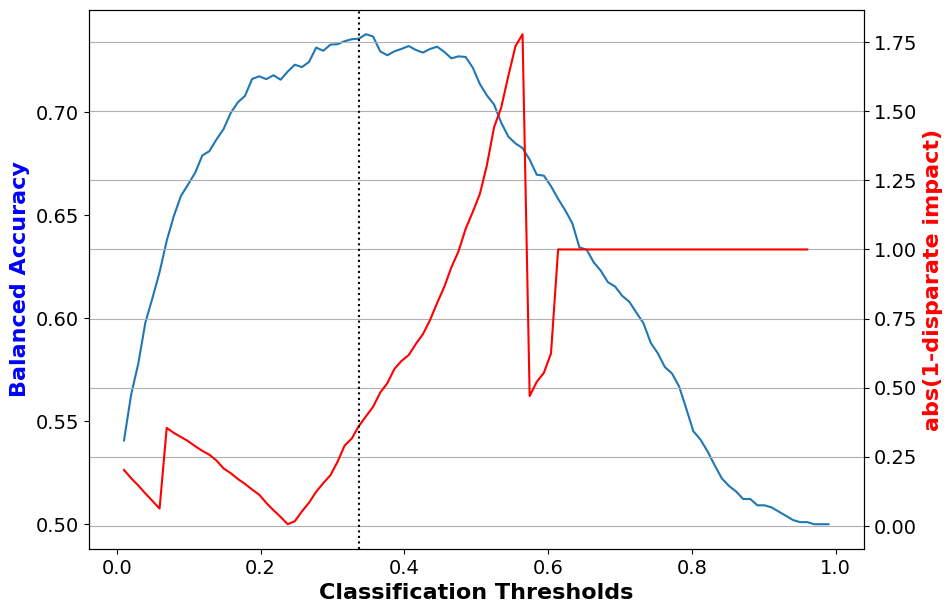

In [21]:
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(class_thresh_arr, bal_acc_arr_orig)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(class_thresh_arr, np.abs(1.0-np.array(disp_imp_arr_orig)), color='r')
ax2.set_ylabel('abs(1-disparate impact)', color='r', fontsize=16, fontweight='bold')
ax2.axvline(best_class_thresh, color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

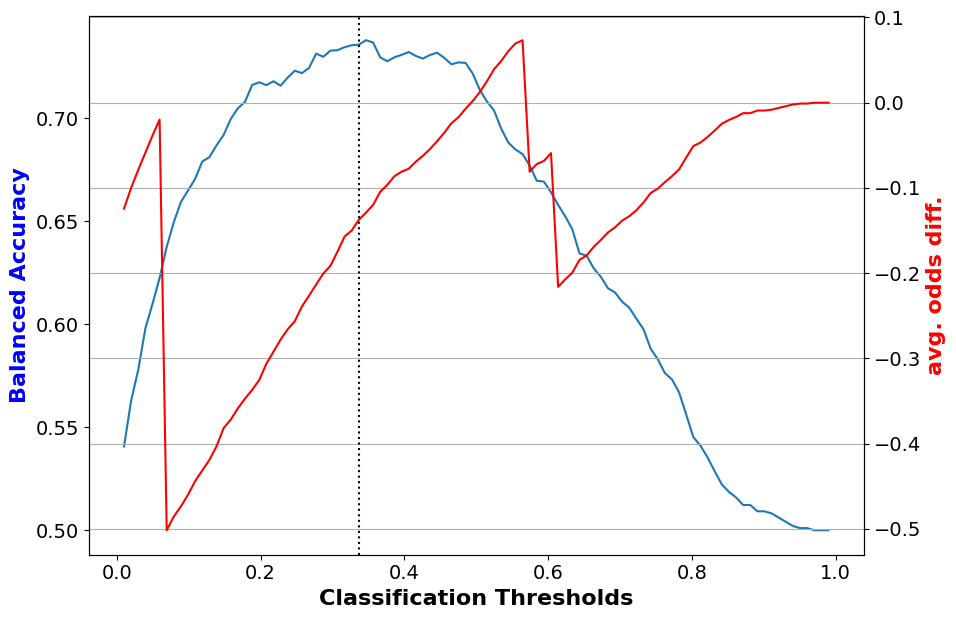

In [22]:
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(class_thresh_arr, bal_acc_arr_orig)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(class_thresh_arr, avg_odds_diff_arr_orig, color='r')
ax2.set_ylabel('avg. odds diff.', color='r', fontsize=16, fontweight='bold')
ax2.axvline(best_class_thresh, color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)